# Laboratorio #2
___

## Fashion MNIST

`Fashion-MNIST es un dataset de imágenes de artículos de ropa proporcionado por Zalando, creado como un reemplazo moderno del clásico MNIST de dígitos manuscritos. Está compuesto por 70,000 imágenes en escala de grises de 28×28 píxeles, divididas en 60,000 imágenes de entrenamiento y 10,000 de prueba. `

`Cada imagen está asociada con una etiqueta que indica el tipo de prenda, perteneciente a 10 clases:`
- **T-shirt/top** (Clase 0)
- **Trouser** (Clase 1)
- **Pullover** (Clase 2)
- **Dress** (Clase 3)
- **Coat** (Clase 4)
- **Sandal** (Clase 5)
- **Shirt** (Clase 6)
- **Sneaker** (Clase 7)
- **Bag** (Clase 8)
- **Ankle boot** (Clase 9)
___

### Librerias

In [5]:
pip install torch

   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/241.4 MB 991.0 kB/s eta 0:04:04
   ---------------------------------------- 0.1/241.4 MB 1.7 MB/s eta 0:02:19
   ---------------------------------------- 0.1/241.4 MB 1.1 MB/s eta 0:03:47
   ---------------------------------------- 0.2/241.4 MB 1.5 MB/s eta 0:02:39
   ---------------------------------------- 0.3/241.4 MB 1.5 MB/s eta 0:02:45
   ---------------------------------------- 0.4/241.4 MB 1.6 MB/s eta 0:02:35
   ---------------------------------------- 0.5/241.4 MB 1.7 MB/s eta 0:02:21
   ---------------------------------------- 0.7/241.4 MB 2.0 MB/s eta 0:02:01
   ---------------------------------------- 0.8/241.4 MB 2.2 MB/s eta 0:01:48
   ---------------------------------------- 1.0/241.4 MB 2.5 MB/s eta 0:01:37
   ---------------------------------------- 1.2/241.4 MB 2.7 MB/s eta 0:01:30
   ---------------------------------------- 1.4/241.4 MB 2.8 MB/s eta

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import sklearn

___

### Importar de datos

In [7]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print(f'Este data set esta conformado por {X_train.shape[0]} imagenes de {X_train.shape[1]}x{X_train.shape[2]} pixeles de datos de muestra.')
print(f'Los datos de entrenamiento suman {X_test.shape[0]} muestras de {X_test.shape[1]}x{X_test.shape[2]} pixeles igual que el entrenamiento.')
print(f'El target tiene {len(np.unique(y_train))} posibles valores de salida.')

Este data set esta conformado por 60000 imagenes de 28x28 pixeles de datos de muestra.
Los datos de entrenamiento suman 10000 muestras de 28x28 pixeles igual que el entrenamiento.
El target tiene 10 posibles valores de salida.


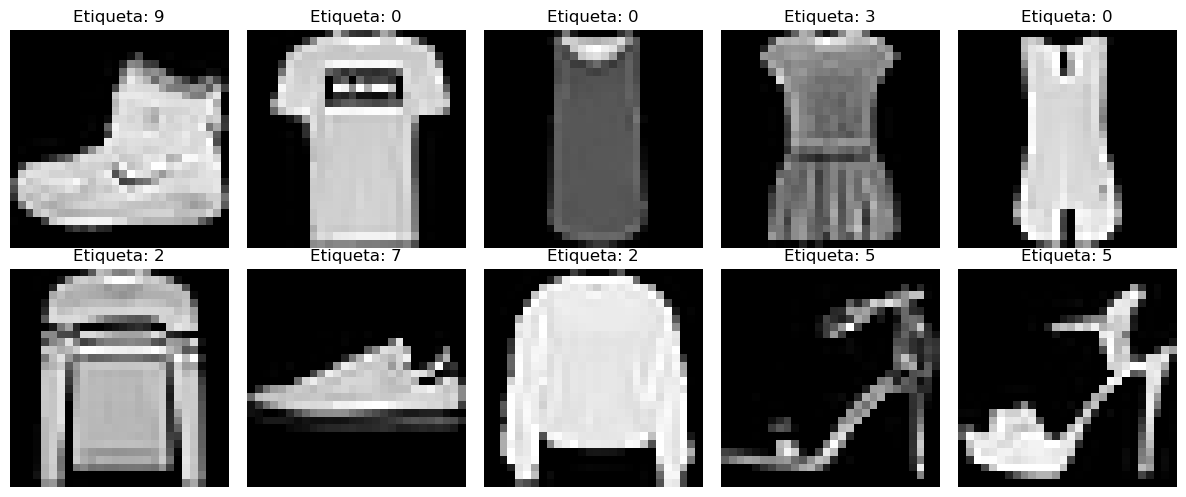

In [9]:
# Ejemplos de las imagenes

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flatten() 

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')      
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

## Modelos
___

### Logistic regression

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
# Aplanar los datos a dos dimensiones

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print(f'Numero de dimensiones nueva del train: {X_train_flat.ndim}.')
print(f'Numero de dimensiones nueva del test: {X_test_flat.ndim}.')

Numero de dimensiones nueva del train: 2.
Numero de dimensiones nueva del test: 2.


In [12]:
# Escalar datos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [13]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
print("Accuracy de Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy de Logistic Regression: 0.8453


In [50]:
print("Reporte de Logistic Regression:\n", classification_report(y_test, y_pred))

Reporte de Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.93      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.90      0.93      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



___

# SVM

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC(
    C= 1.0, kernel= 'rbf', gamma='auto', max_iter= 10000,
    random_state= 19, 
    )

In [31]:
svc.fit(X_train_scaled, y_train)

SVC(gamma='auto', max_iter=10000, random_state=19)

In [32]:
y_pred = svc.predict(X_test_scaled)

In [39]:
print("Accuracy de SVC:", accuracy_score(y_test, y_pred))

Accuracy de SVC: 0.8836


In [40]:
print("Reporte de SVC:\n", classification_report(y_test, y_pred))

Reporte de SVC:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



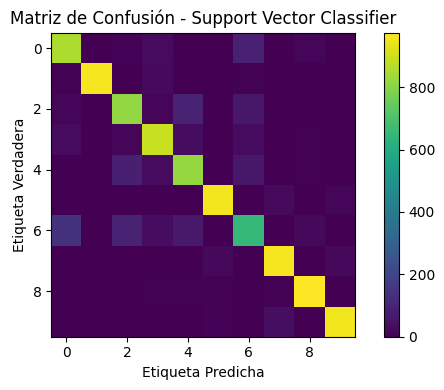

In [37]:
confusion_mtx_svc = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(confusion_mtx_svc)
plt.title('Matriz de Confusión - Support Vector Classifier')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.colorbar()
plt.tight_layout()
plt.show()    

___

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier(
    criterion= 'entropy', n_estimators=100, 
    random_state= 19 
)

In [43]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=19)

In [44]:
y_pred = rfc.predict(X_test_scaled)

In [45]:
print("Accuracy de Random Forest:", accuracy_score(y_test, y_pred))

Accuracy de Random Forest: 0.8762


In [46]:
print("Reporte de Random Forest:\n", classification_report(y_test, y_pred))

Reporte de Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



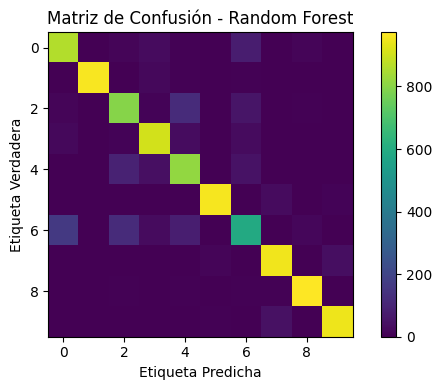

In [47]:
confusion_mtx_rfc = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(confusion_mtx_rfc)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.colorbar()
plt.tight_layout()
plt.show()    

___

# Neural Network (MLP)

___

# Convolutional Neural Network (CNN)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

### Convolutional Neural Network architecture

In [ ]:
cnn = keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), # First Convolutional layer (32 features, 3x3 convloution window)
    layers.MaxPooling2D((2,2)), # 2x2 Filter Window 
    
    layers.Conv2D(64, (3, 3), activation="relu"), # Second Convolutional layer (64 features, 3x3 concolution window)
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu"), # Third Convolutional Layer (64 features, 3x3 convolution window)
    
    layers.Flatten(), # Data gets flattened into 1 dimension
    
    layers.Dense(64, activation="relu"), # Fully connected layer with 64 neurons 
    layers.Dense(10, activation="softmax") # Output layer with 10 output neurons (1 for each class)
])

cnn.summary()

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

He have a total of 93,322 parameters and a total 8 layers (including input and output)

In [46]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

X_train_cnn, X_val, y_train_cnn, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=11)

We create a validation set to constantly check the accuracy of the neural network

In [47]:
history = cnn.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6995 - loss: 1.1222 - val_accuracy: 0.8522 - val_loss: 0.4138
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8514 - loss: 0.4099 - val_accuracy: 0.8746 - val_loss: 0.3537
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8712 - loss: 0.3590 - val_accuracy: 0.8836 - val_loss: 0.3256
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8825 - loss: 0.3188 - val_accuracy: 0.8867 - val_loss: 0.3092
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8863 - loss: 0.3053 - val_accuracy: 0.8975 - val_loss: 0.2768
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8954 - loss: 0.2830 - val_accuracy: 0.9057 - val_loss: 0.2534
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8995 - loss: 0.2671 - val_accuracy: 0.9073 - val_loss: 0.2486
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9009 -

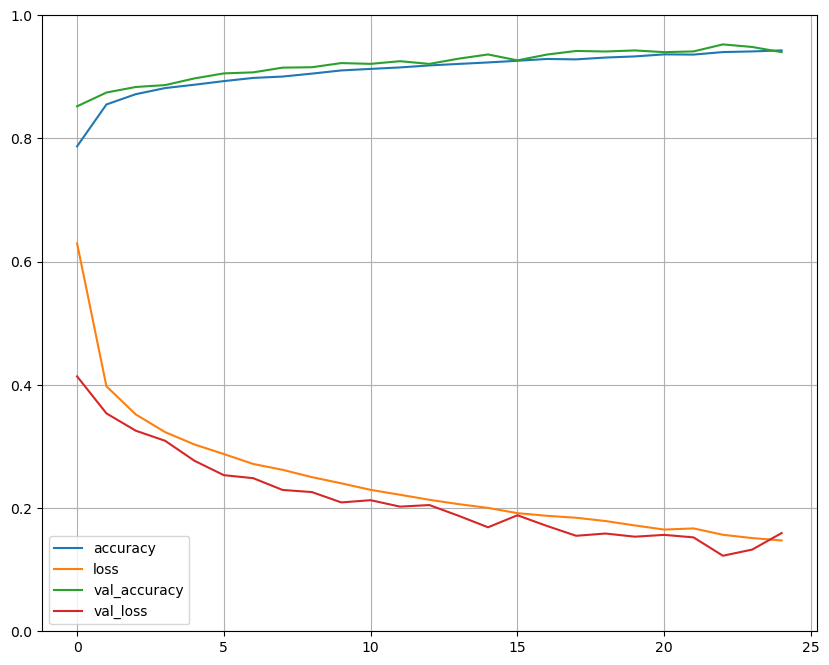

In [48]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [58]:
y_pred_cnn = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [69]:
[(y_test[pred], np.argmax(y_pred_cnn[pred])) for pred in range(10)]

[(9, 9),
 (2, 2),
 (1, 1),
 (1, 1),
 (6, 6),
 (1, 1),
 (4, 4),
 (6, 6),
 (5, 5),
 (7, 7)]